# K-Means Clustering

K-Means clustering algorithm is defined as an unsupervised learning method having an iterative process in which the dataset are grouped into k number of predefined non-overlapping clusters or subgroups, making the inner points of the cluster as similar as possible while trying to keep the clusters at distinct space it allocates the data points to a cluster so that the sum of the squared distance between the clusters centroid and the data point is at a minimum, at this position the centroid of the cluster is the arithmetic mean of the data points that are in the clusters.


 ---

<p align="center">
    <img src="k_means.png" width="700" hight ="800">
</p>

---



This algorithm is an iterative algorithm that partitions the dataset according to their features into K number of predefined non- overlapping distinct clusters or subgroups. It makes the data points of inter clusters as similar as possible and also tries to keep the clusters as far as possible. It allocates the data points to a cluster if the sum of the squared distance between the cluster’s centroid and the data points is at a minimum, where the cluster’s centroid is the arithmetic mean of the data points that are in the cluster. A less variation in the cluster results in similar or homogeneous data points within the cluster.

The way k-means algorithm works is as follows:

- Specify number of clusters K.
- Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
- Compute the sum of the squared distance between data points and all centroids.
- Assign each data point to the closest cluster (centroid).
- Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

## Data 
The Penguins dataset is used to implement and train this algorithm 


## Libraries/Packages: 
The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()


## Importing Dataset

Penguins dataset is being used in this K-Means algorithm

In [74]:
# Import the data
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Data Preprocessing


There are total 334 rows and 7 columns.
The columns includes species, island, bill length, bill depth, flipper length, body mass, and sex.

The dataset consists of 7 columns.

- species: penguin species (Adelie, Gentoo, and Chinstrap)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe)
- sex: penguin sex


In [75]:
#I am dropping all the rows that contain NaN values in this Penguins dataset.
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


We are focusing on all three species and including them. The x-axis is bill length and y-axis is bill depth.
The y labels will be species names.
- If species is Adelie then return 0 
- If species is Chinstrap then return 1
- If species is Gentoo then return 2

In [76]:
X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    elif y == "Chinstrap":
        return 1
    else:
        return 2
    
# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Data Visualization

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

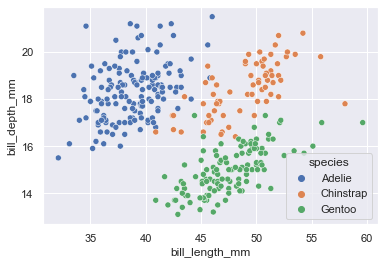

In [79]:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, hue="species")

In [90]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    elif y == 2:
        return "magenta"
    else:
        return "blue"

c = [colors(label) for label in y]

# Comparing the Clusters

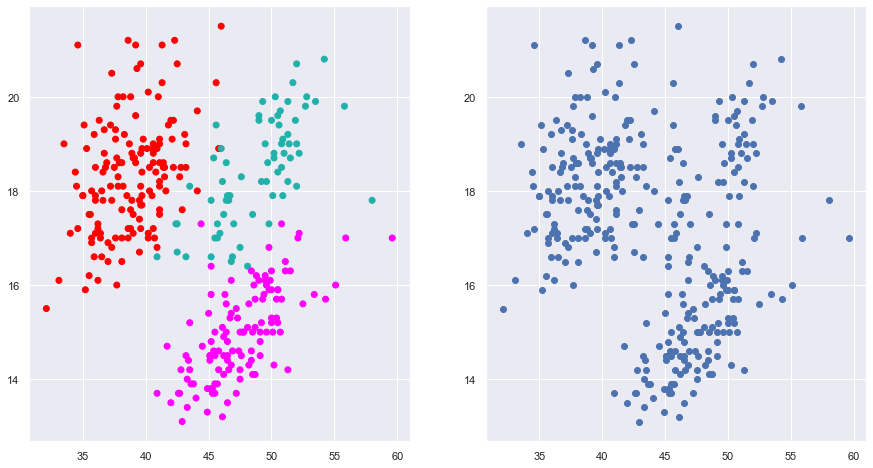

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
ax1.scatter(X[:,0], X[:,1], c=c)
ax2.scatter(X[:, 0], X[:, 1])
plt.show()

# Choosing k value

In [121]:
k = 3
centers = []
for k in range(k):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

# Randomly Assigning Centroids

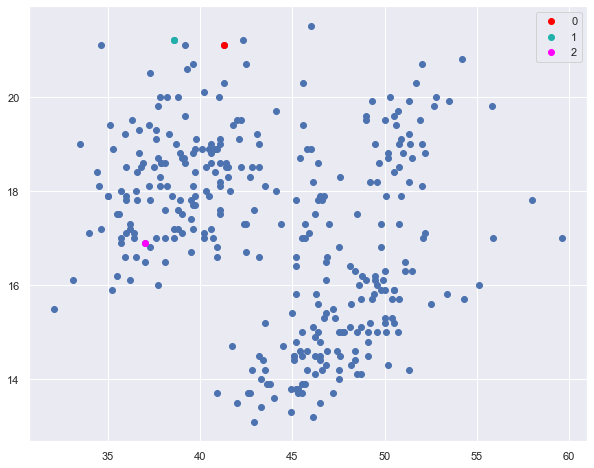

In [122]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.legend()
plt.show()

# Calculate the Distance
After initialization, all data points are traversed, and the distance between all the centroids and the data points are calculated. Now the clusters would be formed depending upon the minimum distance from the centroids.

In [123]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [124]:
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [126]:
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

# Comparing Clusters

Given below cell assigning the clusters based on the centriods. Here I am also comparing with the orginal data clusters that is on left. 

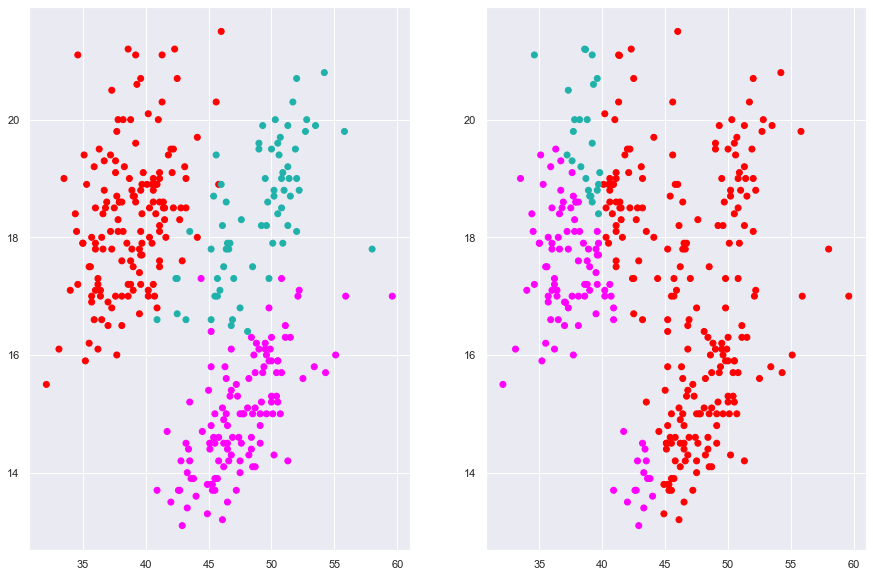

In [128]:

current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])

plt.show()


# Updating the Centeriods

In [129]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1], i) for i in center_means]

In [130]:
new_centers = update_centers(X, centers)

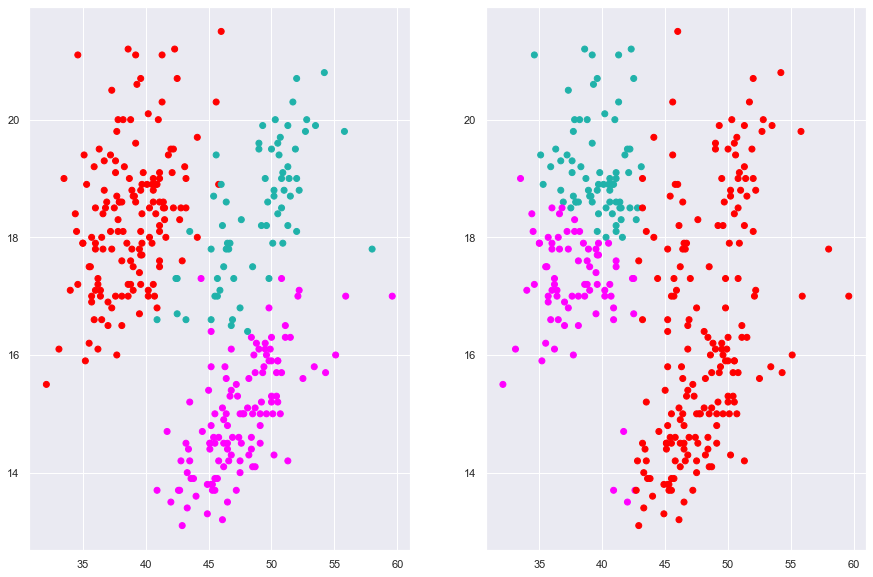

In [131]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

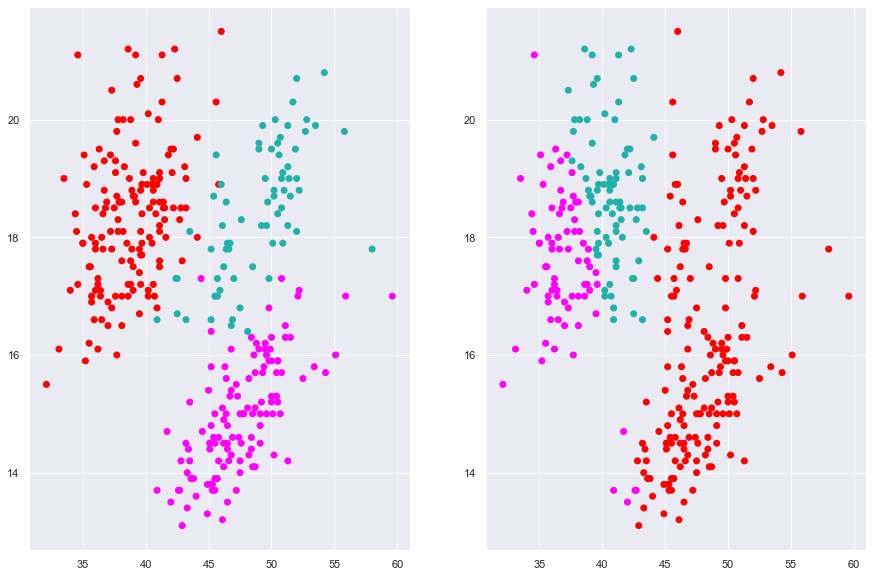

In [132]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

# Making a Function for K- Means Clustering

In [133]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

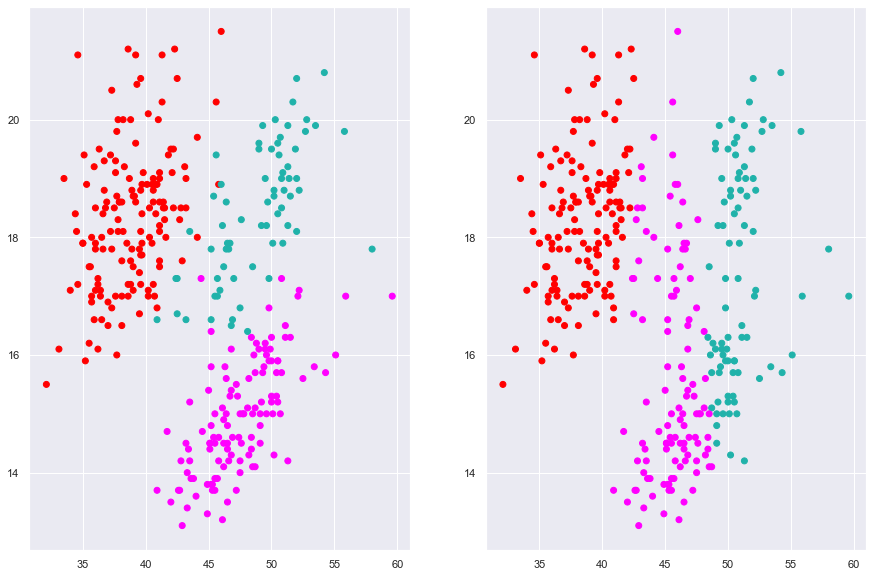

In [134]:
centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

# Checking if K= 4

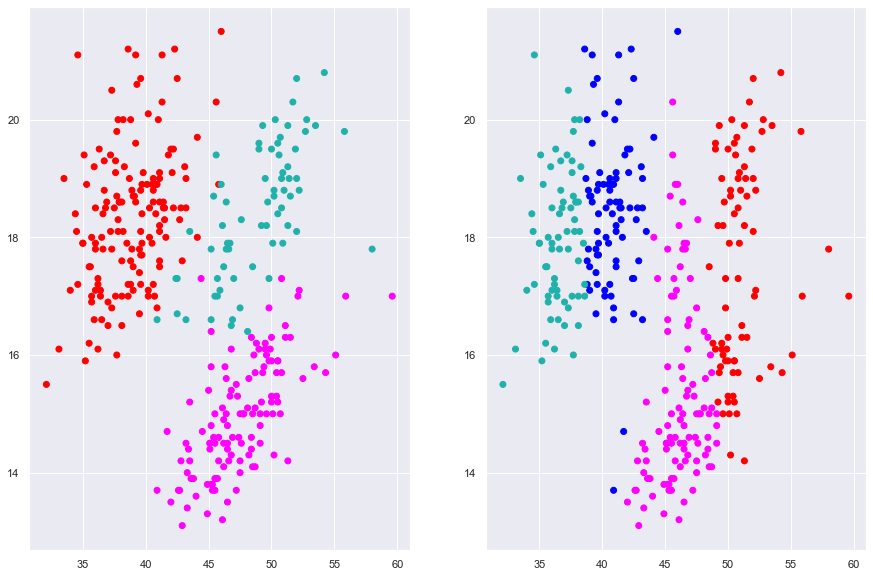

In [135]:
centers = k_means_clustering(X, 4)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

# Conclusion

This K-Means Clustering is a good way to identify the clusters and if we are not aware of the data then we can use K-Means Clustering and identify these clusters and then we can further investigate. This K- Means CLustering is an algorithm under unsupervised learning as we do not know the labels. 
